In [1]:
%load_ext autoreload
%autoreload 2

import pylupnt as pnt
import numpy as np
import matplotlib.pyplot as plt

pnt.Logger.set_level(pnt.Logger.INFO)

[00.07][PyLuPNT] Initializing


In [2]:
# Location
xy_lander = np.array([-7500.0, 4500.0])  # [m]

# Trajectory 1
ds = 1.0  # [m]
R = 20.0  # [m]
dR = 5.0  # [m]
theta_traj_tot = 1 * np.pi
theta_traj = np.linspace(0.0, theta_traj_tot, int(theta_traj_tot * R / ds))
r = (
    R
    - dR * np.sin(theta_traj * 8.0)
    + 0.0 * np.linspace(0.0, 2.0 * dR, len(theta_traj))
)
xy1_rover1 = xy_lander + np.column_stack(
    [r * np.sin(theta_traj), -r * np.cos(theta_traj)]
)

xyz = np.column_stack([xy1_rover1 - xy_lander, np.zeros(len(xy1_rover1))])
xyz = xyz @ pnt.rot_z(-90 * pnt.RAD).T
xy1_rover2 = xyz[:, :2] + xy_lander
length_rover_1 = np.sum(np.sqrt(np.sum(np.diff(xy1_rover1, axis=0) ** 2, axis=1)))

# Trajectory 2
xy_start = xy_lander + np.array([-10.0, -10.0])
xy_end = xy_lander + np.array([200, 1e3])
xy2_rover1 = np.linspace(xy_start, xy_end, int(np.linalg.norm(xy_end - xy_start) / ds))
front = (xy_end - xy_start) / np.linalg.norm(xy_end - xy_start)
left = np.array([-front[1], front[0]])
length_rover_2 = np.sum(np.sqrt(np.sum(np.diff(xy2_rover1, axis=0) ** 2, axis=1)))
xy2_rover1 += (
    10.0
    * left
    * np.sin(np.linspace(0.0, 2.0 * np.pi * length_rover_2 / 50.0, len(xy2_rover1)))[
        :, None
    ]
)

xyz = np.column_stack([xy2_rover1 - xy_lander, np.zeros(len(xy2_rover1))])
xyz = xyz @ pnt.rot_z(-5 * pnt.RAD).T
xy2_rover2 = xyz[:, :2] + xy_lander + np.array([20.0, 20.0])

print("Trajectory 1:", round(length_rover_1, 2), "m", len(xy1_rover1), "waypoints")
print("Trajectory 2:", round(length_rover_2, 2), "m", len(xy2_rover2), "waypoints")

Trajectory 1: 105.16 m 62 waypoints
Trajectory 2: 1031.6 m 1031 waypoints


[03:38.99][DEM Utils] Loaded DEM with shape (2448, 2448, 3)
[03:43.23][DEM Utils] Interpolated DEM with shape (1201, 1201)


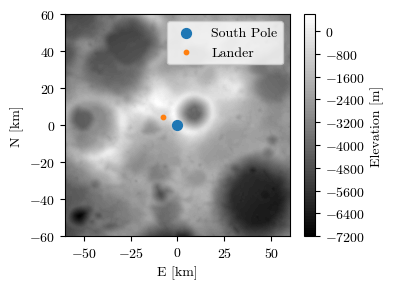

In [10]:
lims_e = [-60e3, 60e3]  # [m]
lims_n = [-60e3, 60e3]  # [m]
res_enu = 100.0  # [m]
dem_enu = pnt.terrain.load_dem_enu(lims_e, lims_n, res_enu)
n_levels = int(np.ptp(dem_enu[:, :, 2]) / 100)

plt.figure(figsize=(4, 3))
plt.contourf(
    dem_enu[:, :, 0] * pnt.KM_M,
    dem_enu[:, :, 1] * pnt.KM_M,
    dem_enu[:, :, 2],
    levels=n_levels,
    cmap="gray",
)
plt.colorbar(label="Elevation [m]")
# plt.plot(xy1_rover1[:, 0] * pnt.KM_M, xy1_rover1[:, 1] * pnt.KM_M, color="C1")
# plt.plot(xy1_rover2[:, 0] * pnt.KM_M, xy1_rover2[:, 1] * pnt.KM_M, color="C2")
# plt.plot(xy2_rover1[:, 0] * pnt.KM_M, xy2_rover1[:, 1] * pnt.KM_M, color="C3")
# plt.plot(xy2_rover2[:, 0] * pnt.KM_M, xy2_rover2[:, 1] * pnt.KM_M, color="C4")
plt.scatter(0, 0, color="C0", s=50, label="South Pole")
plt.scatter(
    xy_lander[0] * pnt.KM_M,
    xy_lander[1] * pnt.KM_M,
    color="C1",
    s=10,
    label="Lander",
    zorder=10,
)
plt.xlabel("E [km]")
plt.ylabel("N [km]")
# plt.plot([], [], "o-", color="C1", label="Trajectory 1")
# plt.plot([], [], "o-", color="C2", label="Trajectory 2")
# plt.plot([], [], "o-", color="C3", label="Trajectory 3")
# plt.plot([], [], "o-", color="C4", label="Trajectory 4")
plt.legend(loc="upper right")
plt.tight_layout()
plt.savefig("location.pdf")
plt.show()

In [ ]:
lims_e = [-10e3, 0e3]  # [m]
lims_n = [0e3, 10e3]  # [m]
res_enu = 10.0  # [m]
dem_enu = pnt.terrain.load_dem_enu(lims_e, lims_n, res_enu)

[04.17][DEM Utils] Loaded DEM with shape (2400, 2400, 3)
[07.85][DEM Utils] Interpolated DEM with shape (1001, 1001)


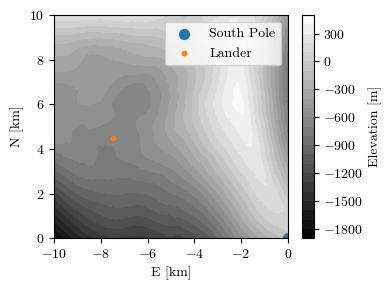

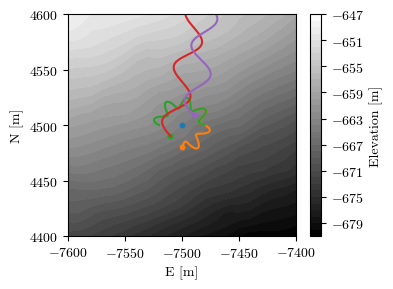

In [ ]:
n_levels = int(np.ptp(dem_enu[:, :, 2]) / 100)

plt.figure(figsize=(4, 3))
plt.contourf(
    dem_enu[:, :, 0] * pnt.KM_M,
    dem_enu[:, :, 1] * pnt.KM_M,
    dem_enu[:, :, 2],
    levels=n_levels,
    cmap="gray",
)
plt.colorbar(label="Elevation [m]")
# plt.plot(xy1_rover1[:, 0] * pnt.KM_M, xy1_rover1[:, 1] * pnt.KM_M, color="C1")
# plt.plot(xy1_rover2[:, 0] * pnt.KM_M, xy1_rover2[:, 1] * pnt.KM_M, color="C2")
# plt.plot(xy2_rover1[:, 0] * pnt.KM_M, xy2_rover1[:, 1] * pnt.KM_M, color="C3")
# plt.plot(xy2_rover2[:, 0] * pnt.KM_M, xy2_rover2[:, 1] * pnt.KM_M, color="C4")
plt.scatter(0, 0, color="C0", s=50, label="South Pole")
plt.scatter(
    xy_lander[0] * pnt.KM_M,
    xy_lander[1] * pnt.KM_M,
    color="C1",
    s=10,
    label="Lander",
    zorder=10,
)
plt.xlabel("E [km]")
plt.ylabel("N [km]")
# plt.plot([], [], "o-", color="C1", label="Trajectory 1")
# plt.plot([], [], "o-", color="C2", label="Trajectory 2")
# plt.plot([], [], "o-", color="C3", label="Trajectory 3")
# plt.plot([], [], "o-", color="C4", label="Trajectory 4")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

dx = 100.0  # [m]
xlims = (xy_lander[0] - dx, xy_lander[0] + dx)
ylims = (xy_lander[1] - dx, xy_lander[1] + dx)
i0 = np.argmin(np.abs(dem_enu[0, :, 0] - xlims[0])) - 1
i1 = np.argmin(np.abs(dem_enu[0, :, 0] - xlims[1])) + 1
j1 = np.argmin(np.abs(dem_enu[:, 0, 1] - ylims[0])) + 1
j0 = np.argmin(np.abs(dem_enu[:, 0, 1] - ylims[1])) - 1
n_levels = int(np.ptp(dem_enu[j0:j1, i0:i1, 2]) / 1)

plt.figure(figsize=(4, 3))
plt.contourf(
    dem_enu[j0:j1, i0:i1, 0],
    dem_enu[j0:j1, i0:i1, 1],
    dem_enu[j0:j1, i0:i1, 2],
    levels=n_levels,
    cmap="gray",
)
plt.colorbar(
    label="Elevation [m]",
)
plt.plot(xy1_rover1[:, 0], xy1_rover1[:, 1], color="C1")
plt.plot(xy1_rover2[:, 0], xy1_rover2[:, 1], color="C2")
plt.scatter(xy1_rover1[0, 0], xy1_rover1[0, 1], color="C1", s=10)
plt.scatter(xy2_rover1[0, 0], xy2_rover1[0, 1], color="C2", s=10)

plt.plot(xy2_rover1[:, 0], xy2_rover1[:, 1], color="C3")
plt.plot(xy2_rover2[:, 0], xy2_rover2[:, 1], color="C4")
plt.scatter(xy2_rover1[0, 0], xy2_rover1[0, 1], color="C2", s=10)
plt.scatter(xy2_rover2[0, 0], xy2_rover2[0, 1], color="C4", s=10)

plt.xlabel("E [m]")
plt.ylabel("N [m]")
plt.scatter(xy_lander[0], xy_lander[1], color="C0", s=10, label="Lander")
plt.xlim(xy_lander[0] - dx, xy_lander[0] + dx)
plt.ylim(xy_lander[1] - dx, xy_lander[1] + dx)
plt.tight_layout()
plt.show()

In [ ]:
pnt.Logger.set_level(pnt.Logger.DEBUG)
run_config = {
    "az": 200.0,
    "el": 10.0,
}
trajectories = {
    "rover0": xy1_rover1,
    "rover1": xy1_rover2,
}

config = pnt.load_config("unreal_engine_agents.yaml::rover")

with pnt.UnrealEngine() as ue:
    ue.remove_all()
    ue.play()

    # Sun
    az, el = run_config["az"] * pnt.RAD, run_config["el"] * pnt.RAD
    ue.set_sun(az, el)

    # Lander
    z_lander = 1.5 + pnt.interpolate_dem(xy_lander, dem_enu)
    xyz_lander = np.concatenate([xy_lander, [z_lander]])
    R_lander = np.eye(3)
    ue.spawn("lander", "blue_moon_lander", xyz_lander, R_lander)

    # Spawn both rovers
    for rover_name, xy_traj in trajectories.items():
        z_rover = 0.5 + pnt.interpolate_dem(xy_traj[0], dem_enu)
        xyz_rover = np.concatenate([xy_traj[0], [z_rover]])
        xyz_rover_next = np.concatenate([xy_traj[1], [z_rover]])
        R_rover = pnt.look_at(xyz_rover, xyz_rover_next)
        ue.spawn(rover_name, "opportunity_rover", xyz_rover, R_rover)

        # Add lights to rover
        if "enable_lights" in run_config:
            enable_lights = run_config["enable_lights"]
        else:
            enable_lights = config["enable_lights"]
        for light_name in enable_lights:
            light_config = config["lights"][light_name].copy()
            light_config["rpy"] = np.deg2rad(light_config["rpy"])
            ue.add_to_agent(rover_name, "light", light_name, light_config)

        # Add cameras to rover
        for cam_name in config["enable_cameras"]:
            cam_config = config["cameras"][cam_name].to_dict()
            cam_config["rpy"] = np.deg2rad(cam_config["rpy"])
            if "camera_properties" in run_config:
                cam_config.update(**run_config["camera_properties"])
            ue.add_to_agent(rover_name, "camera", cam_name, cam_config)

    # Free camera
    xyz_free = xyz_lander + np.array([-25.0, -20.0, 20.0])  # [m]
    R_free = pnt.look_at(xyz_free, xyz_lander)
    ue.spawn("free", "free_agent", xyz_free, R_free)
    ue.add_to_agent(
        "free", "camera", "front", {"width": 1024, "height": 768, "fov": 60.0}
    )

    # Screen
    ue.set_target_view("free")

In [ ]:
pnt.Logger.set_level(pnt.Logger.DEBUG)

import time

H_free = 768
W_free = 1024
H = 768
W = 1024
rover_name = "rover0"
cam_name = "front_left"

In [ ]:
with pnt.UnrealEngine() as ue:
    ue.set_target_view("rover0")
    rgb = ue.render("rover0", "front_left", "rgb", W, H, ss_factor=2)


plt.figure()
plt.imshow(rgb)
plt.show()

from pathlib import Path

desktop = Path.home() / "Desktop"
out_path = desktop / "rover1_front_left_rgb.png"
import cv2

# Convert RGB to BGR for cv2
cv2.imwrite(str(out_path), cv2.cvtColor(rgb, cv2.COLOR_RGB2BGR))
print(f"Saved to {out_path}")

In [ ]:
pnt.Logger.set_level(pnt.Logger.INFO)
ts = time.time()
with pnt.UnrealEngine() as ue:
    for i in range(1):
        for rover_name in ["rover0", "rover1"]:
            for cam_name in [
                "front_left",
                "front_right",
                "back_left",
                "back_right",
                "left_left",
                "left_right",
                "right_left",
                "right_right",
            ]:
                rgb = ue.render(rover_name, cam_name, "rgb", W, H)
                depth = ue.render(rover_name, cam_name, "depth", W, H)
                label = ue.render(rover_name, cam_name, "label", W, H)
    print(time.time() - ts)

In [ ]:
ts = time.time()
with pnt.UnrealEngine() as ue:
    requests = []
    for i in range(1):
        for rover_name in ["rover0", "rover1"]:
            for cam_name in [
                "front_left",
                "front_right",
                "back_left",
                "back_right",
                "left_left",
                "left_right",
                "right_left",
                "right_right",
            ]:
                for render_type in ["rgb", "depth", "label"]:
                    requests.append(
                        {
                            "agent_id": rover_name,
                            "camera": cam_name,
                            "render_type": render_type,
                            "width": W,
                            "height": H,
                        }
                    )

        results = ue.batch_render(requests)  # 10-20x faster!
print(time.time() - ts)

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(10, 8))
axs[0].imshow(rgb)
axs[1].imshow(depth)
axs[2].imshow(label)
for i in range(3):
    axs[i].axis("off")
plt.tight_layout()
plt.show()

In [ ]:
with pnt.UnrealEngine() as ue:
    ue.clear_render_target_pool()

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(10, 8))
axs[0].imshow(results[-3].image)
axs[1].imshow(results[-2].image)
axs[2].imshow(results[-1].image)
for i in range(3):
    axs[i].axis("off")
plt.tight_layout()
plt.show()

In [ ]:
with pnt.UnrealEngine() as ue:
    ue.remove_all()
    ue.play()

    # Sun
    ue.set_sun(az, el)
    ue.spawn("lander", "blue_moon_lander", xyz_lander, R_lander)
    ue.spawn("free", "free_agent", xyz_cam, R_cam)
    ue.add_to_agent(
        "free",
        "camera",
        "front",
        {"projection_type": "orthographic", "ortho_width": ortho_width},
    )
    ue.spawn("rover", "opportunity_rover", xyz_rover, R_rover)

    rgb = ue.render("free", "front", "rgb")
    label = ue.render("free", "front", "label")
    depth = ue.render("free", "front", "depth")
    height = z_cam - depth

fig, axs = plt.subplots(1, 3, figsize=(10, 8))
axs[0].imshow(rgb)
axs[1].imshow(depth)
axs[2].imshow(label)
for i in range(3):
    axs[i].axis("off")
plt.tight_layout()
plt.show()

In [ ]:
# Config
THROTTLE_CONST = 1.0
LOOKAHEAD_DIST = 2.0
STEERING_GAIN = 0.7
STOP_THRESHOLD = 2.0  # [m]
LOOP_SLEEP = 1.0  # [s]
MAX_TIME = 5.0 * 60.0  # [s]
MAX_STEERING = 0.5
xy_rover = xy_rover_2  # Trajectory to follow

# Goal to reach
final_goal = xy_rover[-1]
last_steering = 0.0  # To hold steering value if velocity is zero

states = []
time = 0.0
with pnt.UnrealEngine() as ue:
    ue.remove_all()
    ue.play()

    # Sun
    az, el = 0.0 * pnt.RAD, 45.0 * pnt.RAD
    ue.set_sun(az, el)

    # Lander
    z_lander = 0.5 + pnt.interpolate_dem(xy_lander, dem_enu)
    xyz_lander = np.concatenate([xy_lander, [z_lander]])
    R_lander = np.eye(3)
    ue.spawn("lander", "blue_moon_lander", xyz_lander, R_lander)

    # Rover
    z_rover = 0.5 + pnt.interpolate_dem(xy_rover[0], dem_enu)
    xyz_rover = np.concatenate([xy_rover[0], [z_rover]])
    xyz_rover_next = np.concatenate([xy_rover[1], [z_rover]])
    R_rover = pnt.look_at(xyz_rover, xyz_rover_next)
    ue.spawn("rover", "opportunity_rover", xyz_rover, R_rover)

    # Screen
    ue.set_target_view("rover")

with pnt.UnrealEngine() as ue:
    ue.pause()
    ue.set_time_dilation(1.0)
    ue.set_timestep(1.0 / 20.0)
    ue.play()

    while time < MAX_TIME:
        # Get Current Rover State
        state = ue.get_state("rover")
        states.append(state)
        current_pos = state.position[:2]
        velocity_vec = state.velocity[:2]

        # Check for Termination
        dist_to_goal = np.linalg.norm(current_pos - final_goal)
        if dist_to_goal < STOP_THRESHOLD:
            print("Reached final goal!")
            ue.set_control("rover", 0.0, 0.0)  # Stop the rover
            break

        # Estimate Current Yaw
        if np.linalg.norm(velocity_vec) > 0.1:
            current_yaw = np.arctan2(velocity_vec[1], velocity_vec[0])
            is_moving = True
        else:
            current_yaw = 0.0  # Placeholder, won't be used
            is_moving = False

        # Find the Target Waypoint

        # Find the index of the closest point on the path to the rover
        distances = np.linalg.norm(xy_rover - current_pos, axis=1)
        closest_idx = np.argmin(distances)

        # Search forward from that closest point to find the first point
        # that is at least LOOKAHEAD_DIST away.
        target_idx = closest_idx
        while target_idx < len(xy_rover) - 1:
            dist_to_target = np.linalg.norm(xy_rover[target_idx] - current_pos)
            if dist_to_target >= LOOKAHEAD_DIST:
                break  # Found our target point
            target_idx += 1

        target_waypoint = xy_rover[target_idx]

        # Calculate Steering Angle
        if is_moving:
            # Vector from rover to target in the global (world) frame
            vector_global = target_waypoint - current_pos

            # Transform this vector into the rover's local reference frame
            # (i.e., rotate it by -current_yaw)
            x_local = vector_global[0] * np.cos(current_yaw) + vector_global[
                1
            ] * np.sin(current_yaw)
            y_local = -vector_global[0] * np.sin(current_yaw) + vector_global[
                1
            ] * np.cos(current_yaw)

            # Calculate the angle 'alpha' to the target point in the rover's frame.
            # This is our "error angle".
            alpha = np.arctan2(y_local, x_local)

            # Use a simple proportional controller: steering = gain * error
            steering = -STEERING_GAIN * alpha

            # Clip the steering command to the valid range [-1, 1]
            steering = np.clip(steering, -MAX_STEERING, MAX_STEERING)
            last_steering = steering
        else:
            # If not moving, just use the last calculated steering
            # while applying throttle to get going.
            steering = last_steering

        # Set Controls
        throttle = THROTTLE_CONST
        ue.set_control("rover", throttle, steering)

        # Sleep to maintain the control loop rate
        ue.step(LOOP_SLEEP)
        time += LOOP_SLEEP

In [ ]:
print(states[-1].timestamp - states[0].timestamp)
print(states[-1].timestamp - states[-2].timestamp)

In [ ]:
from copy import deepcopy

config = pnt.load_config("unreal_rover.yaml")

rgbs = {}
with pnt.UnrealEngine() as ue:
    for cam_name, cam_config in config["rover"]["cameras"].items():
        try:
            ue.remove_from_agent("rover", "camera", cam_name)
        except Exception as e:
            pass
        cam_config["rpy"] = np.deg2rad(cam_config["rpy"])
        ue.add_to_agent("rover", "camera", cam_name, cam_config)
        rgb = ue.render("rover", cam_name, "rgb")
        rgbs[cam_name] = rgb

In [ ]:
config = pnt.load_config("unreal_rover.yaml")
with pnt.UnrealEngine() as ue:
    for light_name, light_config in config["rover"]["lights"].items():
        try:
            ue.remove_from_agent("rover", "light", light_name)
        except Exception as e:
            pass
        light_config["rpy"] = np.deg2rad(light_config["rpy"])
        ue.add_to_agent("rover", "light", light_name, light_config)

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(12, 4))
axes = axes.flatten()
for idx, (cam_name, rgb) in enumerate(rgbs.items()):
    axes[idx].imshow(rgb)
    axes[idx].set_title(cam_name)
    axes[idx].axis("off")
for idx in range(len(rgbs), len(axes)):
    axes[idx].axis("off")
plt.tight_layout()
plt.show()

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(12, 4))
axes = axes.flatten()
for idx, (cam_name, rgb) in enumerate(rgbs.items()):
    axes[idx].imshow(rgb)
    axes[idx].set_title(cam_name)
    axes[idx].axis("off")
for idx in range(len(rgbs), len(axes)):
    axes[idx].axis("off")
plt.tight_layout()
plt.show()

In [ ]:
config = pnt.load_config("unreal_rover.yaml")
with pnt.UnrealEngine() as ue:
    for tag_name, tag_config in config["lander"]["apriltags"].items():
        try:
            ue.remove_from_agent("lander", "apriltag", tag_name)
        except Exception as e:
            pass
        tag_config["rpy"] = np.deg2rad(tag_config["rpy"])
        tag_config["xyz"] = np.array(tag_config["xyz"])
        ue.add_to_agent("lander", "apriltag", tag_name, tag_config)

In [ ]:
with pnt.UnrealEngine() as ue:
    print(ue.get_state("rover"))

In [ ]:
with pnt.UnrealEngine() as ue:
    try:
        ue.remove_spotlight("rover", "front")
    except Exception as e:
        pass
    ue.add_spotlight("rover", "front")
    ue.set_spotlight_transform("rover", "front", [0.5, 0.0, 1.0], [0.0, 0.0, 0.0])
    ue.set_spotlight_properties("rover", "front", {"Intensity": 0.0})

In [ ]:
with pnt.UnrealEngine() as ue:
    rgb = ue.render("rover", "front_left", "rgb", 2 * W, 2 * H, fov)
    plt.imshow(rgb)
    plt.axis("off")
    plt.show()

In [ ]:
with pnt.UnrealEngine() as ue:
    rgb = ue.render("rover", "front_left", "rgb", 2 * W, 2 * H, fov)
    plt.imshow(rgb)
    plt.axis("off")
    plt.show()

In [ ]:
with pnt.UnrealEngine() as ue:
    ue.set_control("rover", 1.0, 0.2)

In [ ]:
W, H = 1024, 728
fov = 45.0 * pnt.RAD

with pnt.UnrealEngine() as ue:
    # Sun
    el = 2.0 * pnt.RAD
    az = 90.0 * pnt.RAD

    az_unreal, el_unreal = az_el_to_az_el_unreal(az, el)
    ue.set_sun(az_unreal, el_unreal)

    # Camera
    dist = 10.0  # [m]
    theta = 0.0 * pnt.RAD
    height = 1  # [m]

    xyz_cam, R_cam = get_camera_xyz_rot(xy_rover_1[0], xy_rover_1[1])

    xyz_unreal = xyz_to_xyz_unreal(xyz_cam)
    rpy_unreal = rot_to_rpy_unreal(R_cam)

    try:
        ue.spawn("free_camera", "camera", xyz_unreal, rpy_unreal)
    except Exception as e:
        ue.set_actor_transform("camera", xyz_unreal, rpy_unreal)

    rgb = ue.render("camera", "front", "rgb", W, H, fov)
    depth = ue.render("camera", "front", "depth", W, H, fov)
    label = ue.render("camera", "front", "label", W, H, fov)

fig, axes = plt.subplots(1, 3, figsize=(10, 5))
axes[0].imshow(rgb)
axes[1].imshow(np.log10(depth), cmap="gray")
axes[2].imshow(label)
plt.show()

In [ ]:
import shutil
from pathlib import Path
import numpy as np
from scipy.spatial.transform import Rotation
from tqdm import tqdm
import yaml
import pylupnt as pnt  # Assuming this is your Unreal Engine interface library
import sys
import cv2

dataset_path = Path("/home/shared_ws6/local_traverse")

az, el = 90.0 * pnt.RAD, 5.0 * pnt.RAD
H, W = 768, 1024
fov = 60.0 * pnt.RAD
dt = 1.0

flag_render = True

body_T_cam = np.eye(4)

# Intrinsic parameters
fx, fy = pnt.fov_to_focal_length([W, H], [fov, fov])
cx = W / 2.0
cy = H / 2.0

agent_path = dataset_path / "rover0"
gt_path = agent_path / "state_groundtruth_estimate_rover0"
imu_path = agent_path / "imu_rover0"

agent_name = "rover0"
camera_name = "front"
camera_dir = agent_path / f"cam_{camera_name}"
render_types = ["rgb", "depth", "label"]

print(f"Setting up directory structure at: {dataset_path}")
if dataset_path.exists():
    resp = (
        input(f"Dataset path {dataset_path} exists. Overwrite? [y/N]: ").strip().lower()
    )
    if resp not in ["y", "yes"]:
        print("Aborting dataset generation.")
        sys.exit(1)
    shutil.rmtree(dataset_path)

# Create directories and open CSV files for writing
csv_files = {}
for render_type in render_types:
    (camera_dir / render_type).mkdir(parents=True, exist_ok=True)

gt_path.mkdir(parents=True, exist_ok=True)
imu_path.mkdir(parents=True, exist_ok=True)

csv_path = agent_path / f"cam_{camera_name}" / "data.csv"
csv_files[camera_name] = open(csv_path, "w")
csv_files[camera_name].write("#timestamp [ns],filename\n")

# Run Simulation and Generate Data
all_timestamps_ns = []
all_positions = []
all_rotations = []

print("Starting simulation and data generation...")
with pnt.UnrealEngine() as ue:

    for i in tqdm(range(len(xy_rover_1) - 1), desc="Rendering frames"):
        # Calculate timestamp
        timestamp_sec = i * dt
        timestamp_ns = int(timestamp_sec * 1e9)
        all_timestamps_ns.append(timestamp_ns)

        # Get camera pose
        xyz_cam, R_cam = get_camera_xyz_rot(xy_rover_1[i], xy_rover_1[i + 1])
        all_positions.append(xyz_cam)
        all_rotations.append(R_cam)

        # Set camera pose in Unreal
        if flag_render:
            xyz_unreal = xyz_to_xyz_unreal(xyz_cam)
            rpy_unreal = rot_to_rpy_unreal(R_cam)
            ue.set_actor_transform("camera", xyz_unreal, rpy_unreal)

            # Render images
            rgb = ue.render("camera", "front", "rgb", W, H, fov)
            depth = ue.render("camera", "front", "depth", W, H, fov)
            label = ue.render("camera", "front", "label", W, H, fov)

            timestamp_str = f"{timestamp_ns}"
            rgb_path = camera_dir / "rgb" / f"{timestamp_str}.png"
            depth_path = camera_dir / "depth" / f"{timestamp_str}.tiff"
            label_path = camera_dir / "label" / f"{timestamp_str}.png"

            cv2.imwrite(str(rgb_path), cv2.cvtColor(rgb, cv2.COLOR_RGB2BGR))
            cv2.imwrite(str(depth_path), depth)
            cv2.imwrite(str(label_path), label)

            csv_files[camera_name].write(f"{timestamp_ns},{timestamp_str}.png\n")


# Close all sensor CSV files
for f in csv_files.values():
    f.close()

# 4. Post-Process and Write Ground Truth & Calibration
print("Writing groundtruth and calibration files...")
all_positions = np.array(all_positions)
all_rotations = np.array(all_rotations)

# Write Ground Truth CSV
with open(gt_path / "data.csv", "w") as f:
    f.write(
        "#timestamp [ns], p_x [m], p_y [m], p_z [m], q_w, q_x, q_y, q_z, v_x [m/s], v_y [m/s], v_z [m/s], b_w_x [rad/s], b_w_y [rad/s], b_w_z [rad/s], b_a_x [m/s^2], b_a_y [m/s^2], b_a_z [m/s^2]\n"
    )
    velocities = np.gradient(all_positions, dt, axis=0)
    zero_biases = np.zeros(6)

    for i in range(len(all_timestamps_ns)):
        quat_xyzw = Rotation.from_matrix(all_rotations[i]).as_quat()
        quat_wxyz = [quat_xyzw[3], quat_xyzw[0], quat_xyzw[1], quat_xyzw[2]]
        data_list = (
            [all_timestamps_ns[i]]
            + all_positions[i].tolist()
            + quat_wxyz
            + velocities[i].tolist()
            + zero_biases.tolist()
        )
        f.write(",".join(map(str, data_list)) + "\n")

In [ ]:
# Write YAML Calibration Files
intrinsics = [fx, fy, cx, cy]

sensor_yaml = {
    "sensor_type": "camera",
    "comment": f"{camera_name.capitalize()} camera",
    "T_BS": {
        "rows": 4,
        "cols": 4,
        "data": [float(val) for val in body_T_cam.flatten()],
    },
    "rate_hz": 1.0 / dt,
    "resolution": [W, H],
    "camera_model": "pinhole",
    "intrinsics": [float(val) for val in intrinsics],
    "distortion_model": "radtan",
    "distortion_coeffs": [0.0, 0.0, 0.0, 0.0],
}

import yaml


class BracketedListDumper(yaml.SafeDumper):
    def represent_list(self, data):
        # Represent using flow style (i.e., [a, b, c])
        return self.represent_sequence("tag:yaml.org,2002:seq", data, flow_style=True)


BracketedListDumper.add_representer(list, BracketedListDumper.represent_list)

with open(agent_path / f"cam_{camera_name}" / "sensor.yaml", "w") as f:
    yaml.dump(sensor_yaml, f, sort_keys=False, Dumper=BracketedListDumper)

print(agent_path / f"cam_{camera_name}" / "sensor.yaml")
print("\nDataset creation in EuRoC format complete!")

# TSDF

In [ ]:
import pylupnt as pnt
import open3d as o3d
import pylupnt as pnt
import cv2
from tqdm import tqdm

# Example: Integrate depth images into a TSDF volume using Open3D
camera_name = "free"

# Parameters for TSDF volume
voxel_length = 0.01  # in meters
sdf_trunc = 0.1
color_type = o3d.pipelines.integration.TSDFVolumeColorType.RGB8

volume = o3d.pipelines.integration.ScalableTSDFVolume(
    voxel_length=voxel_length,
    sdf_trunc=sdf_trunc,
    color_type=color_type,
)

cy, cx = H / 2.0, W / 2.0
fy, fx = pnt.fov_to_focal_length([H, W], [fov, fov])

# Camera intrinsics (assuming pinhole model)
intrinsic = o3d.camera.PinholeCameraIntrinsic(
    width=W, height=H, fx=fx, fy=fy, cx=cx, cy=cy
)
# Integrate all frames
for i in tqdm(range(50)):
    # --- 1. Load images ---
    rgb = o3d.io.read_image(str(dataset_path / f"rgb_{camera_name}" / f"{i:06d}.png"))

    # Load depth as a float32 NumPy array
    depth_np = cv2.imread(
        str(dataset_path / f"depth_{camera_name}" / f"{i:06d}.tiff"),
        cv2.IMREAD_UNCHANGED,
    )
    if depth_np.dtype != np.float32:
        depth_np = depth_np.astype(np.float32)  # Ensure it's float32

    # Load the semantic label image as a NumPy array
    label_np = np.asarray(
        o3d.io.read_image(str(dataset_path / f"label_{camera_name}" / f"{i:06d}.png"))
    )

    # --- 2. Mask out the sky ---
    # Create a boolean mask where the label image equals the sky ID
    sky_mask = label_np == pnt.UnrealEngine.Label.SKY

    # Set the depth of sky pixels to 0 to invalidate them
    depth_np[sky_mask] = 0.0

    # Convert the modified NumPy depth array to an Open3D Image
    depth = o3d.geometry.Image(depth_np)

    # --- 3. Get camera pose ---
    # Your 'pose' variable should be the camera-to-world transformation
    pose = poses[i] @ pnt.FLU_T_OCV

    # --- 4. Integrate into TSDF with correct parameters for float depth ---
    volume.integrate(
        o3d.geometry.RGBDImage.create_from_color_and_depth(
            rgb,
            depth,
            depth_scale=1.0,  # CRITICAL: Tells Open3D depth is in meters
            depth_trunc=3.0,  # Optional: Truncates depth beyond 3 meters
            convert_rgb_to_intensity=False,
        ),
        intrinsic,
        np.linalg.pinv(
            pose
        ),  # The integrate function needs the world-to-camera transform
    )

# --- 5. Extract the final mesh ---
mesh = volume.extract_triangle_mesh()
mesh.compute_vertex_normals()

In [ ]:
with pnt.RemoteDisplay(1):
    o3d.visualization.draw_geometries([mesh])